In [1]:
from math import sqrt

def divides(k, n):
    """Return whether k evenly divides n."""
    return n % k == 0

def factors(n):
    """Count the positive integers that evenly divide n.

    >>> factors(576)
    21
    """
    total = 0
    for k in range(1, n+1):
        if divides(k, n):
            total += 1
    return total

def factors_fast(n):
    """Count the positive integers that evenly divide n.

    >>> factors_fast(576)
    21
    """
    sqrt_n = sqrt(n)
    k, total = 1, 0
    while k < sqrt_n:
        if divides(k, n):
            total += 2
        k += 1
    if k * k == n:
        total += 1
    return total

In [2]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('ggplot')

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, order=None, n=25, pct=0.1):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e6 * median(sample) for sample in zip(*samples)]
    
    plots.figure(figsize=(8, 8))
    plots.plot(xs, ys)
    
    if order:
        slopes = [y / order(x) for (x, y) in zip(xs, ys)]
        for slope in (percentile(slopes, pct), percentile(slopes, 100-pct)):
            plots.plot(xs, [slope * order(x) for x in xs], linewidth=3)

In [3]:
args = range(20, 1000)

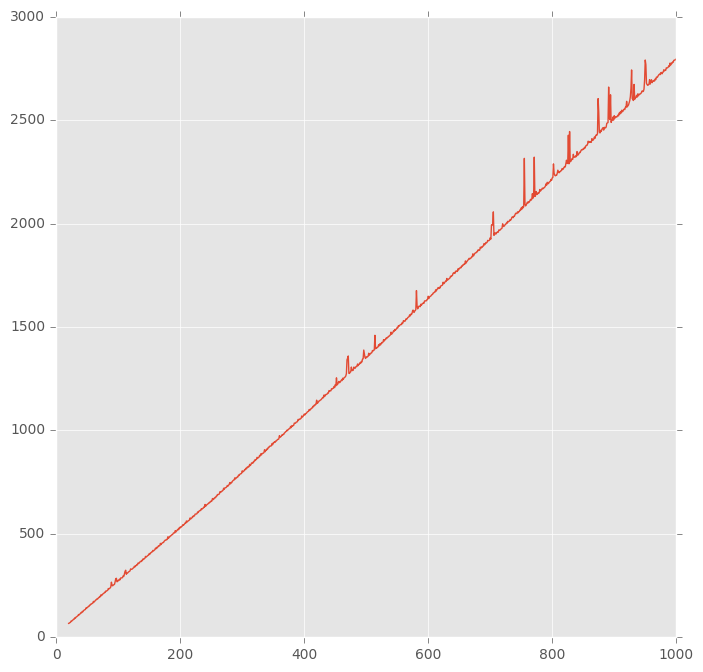

In [4]:
plot_times('factors', args)

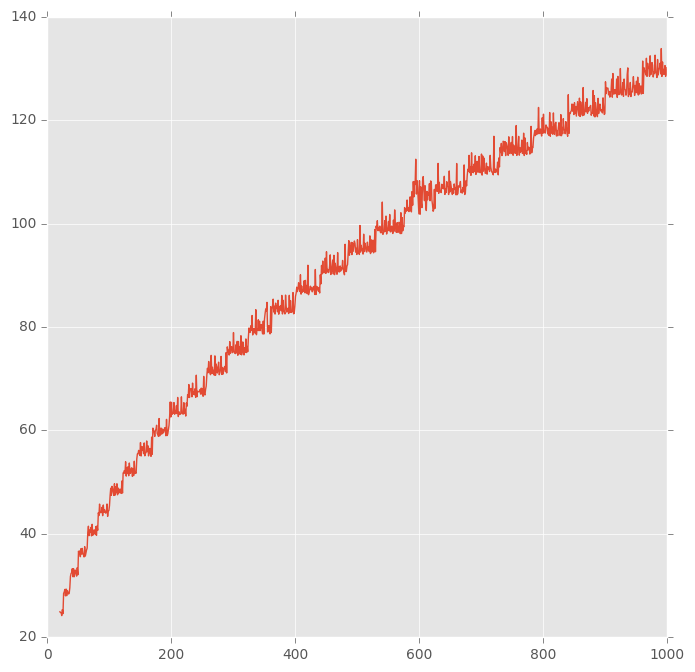

In [5]:
plot_times('factors_fast', args)

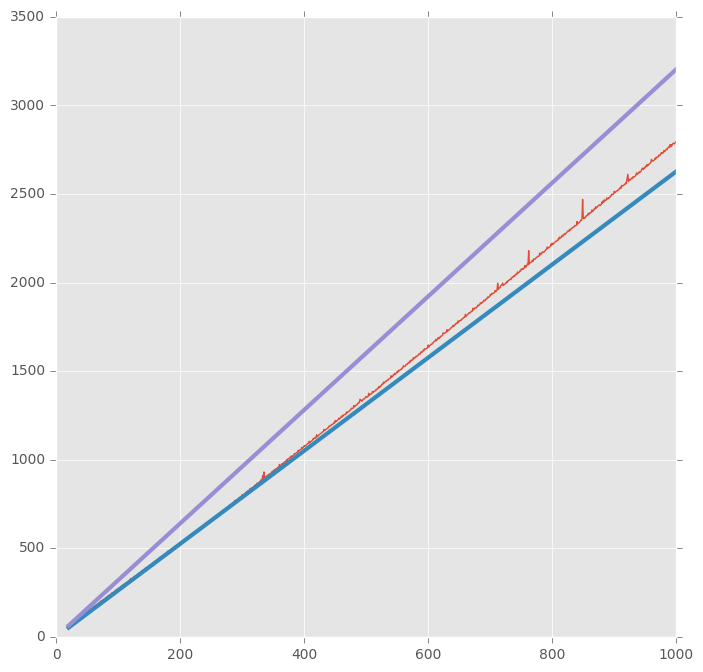

In [6]:
plot_times('factors', args, lambda x: x)

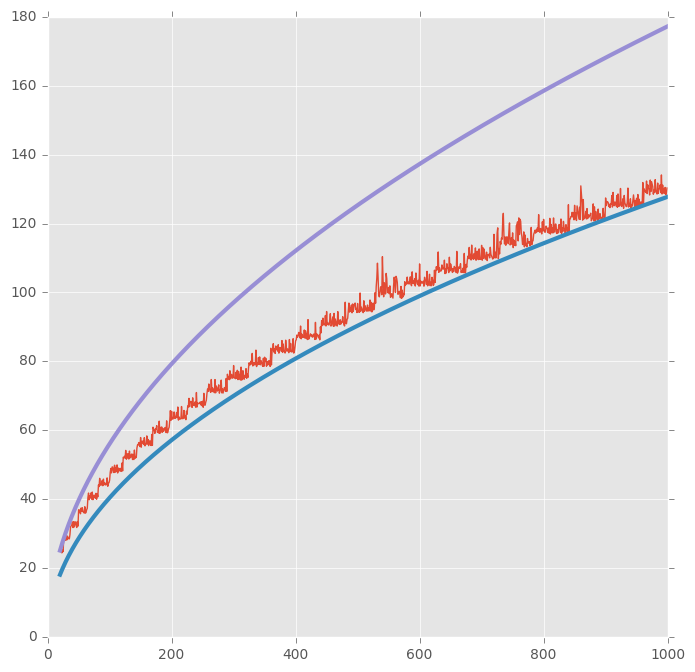

In [7]:
plot_times('factors_fast', args, sqrt)

In [8]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n-1)

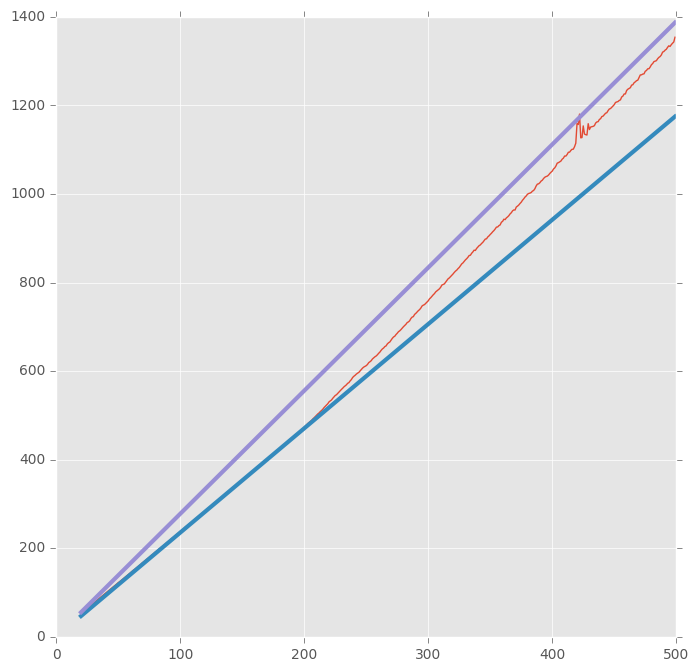

In [9]:
exp_2 = lambda n: exp(2.0, n)

plot_times('exp_2', range(20, 500), lambda x: x)

In [10]:
def square(x):
    return x*x

def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n//2))
    else:
        return b * exp_fast(b, n-1)

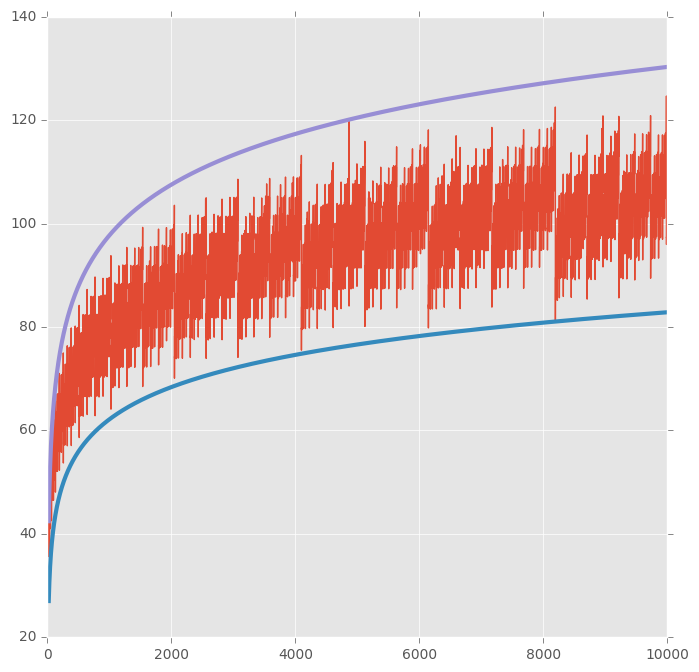

In [11]:
exp_2_fast = lambda n: exp_fast(2.0, n)

from math import log
plot_times('exp_2_fast', range(20, 10000), log, pct=0)